In [ ]:
!pip install --upgrade xlrd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
pd.__version__

'1.4.2'

In [ ]:
data = pd.read_excel('titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
data.shape

(1309, 14)

In [ ]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
# Valeurs Manquantes par colonnes
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

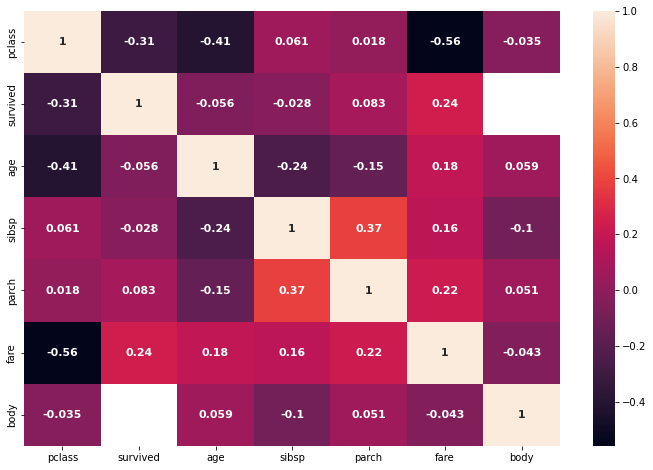

In [ ]:
# Aperçu des corrélations entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.show()

In [ ]:
df = data.copy()
# Création de la colonne Titre
df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)
print("Valeurs Uniques : ", df['title'].unique())

Valeurs Uniques :  ['Miss' 'Master' 'Mr' 'Mrs' 'Col' 'Mme' 'Dr' 'Major' 'Capt' 'Lady' 'Sir'
 'Mlle' 'Dona' 'Jonkheer' 'Countess' 'Don' 'Rev' 'Ms']


In [ ]:
# Suppression des colonnes jugés inutiles
df = df.drop(['name', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df.head(2)

,pclass,survived,sex,age,sibsp,parch,embarked,title
0,1,1,female,29.0000,0,0,S,Miss
1,1,1,male,0.9167,1,2,S,Master


In [ ]:
# Création d'une colonne Alone, pour savoir si le passenger était seul ou accompagné
df['alone'] = df['sibsp'] + df['parch']
df['alone'].loc[df['alone'] > 0] = 'no'
df['alone'].loc[df['alone'] == 0] = 'yes'

# Création d'une colonne Family_Size pour connaitre la taille de la famille du passenger
df['family_size'] = df['sibsp'] + df['parch'] + 1

df.head(2)

,pclass,survived,sex,age,sibsp,parch,embarked,title,alone,family_size
0,1,1,female,29.0000,0,0,S,Miss,yes,1
1,1,1,male,0.9167,1,2,S,Master,no,4


In [ ]:
df = df.drop(['sibsp', 'parch'], axis=1)

In [ ]:
# Remplacement des valeurs nulles
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.isnull().sum()

# Conversion des âges en entier
age_convert = [math.ceil(ele) for ele in df['age']]
df['age'] = age_convert

In [ ]:
# Création d'une colonne definissant si la personne est [Enfant, Jeune_Ado, Adulte ou Ainé(Vieillard)]
def cat_personne(passenger):
  age, gender = passenger
  if age >= 0 and age <= 14:
    return 'child'
  elif age >= 15 and age <= 24:
    return 'young'
  elif age >= 25 and age <= 64:
    return 'adult'
  else:
    return 'old_man'
df['gender'] = np.nan
df['gender'] = df[['age', 'gender']].apply(cat_personne, axis=1)
df.head()

,pclass,survived,sex,age,embarked,title,alone,family_size,gender
0,1,1,female,29,S,Miss,yes,1,adult
1,1,1,male,1,S,Master,no,4,child
2,1,0,female,2,S,Miss,no,4,child
3,1,0,male,30,S,Mr,no,4,adult
4,1,0,female,25,S,Mrs,no,4,adult


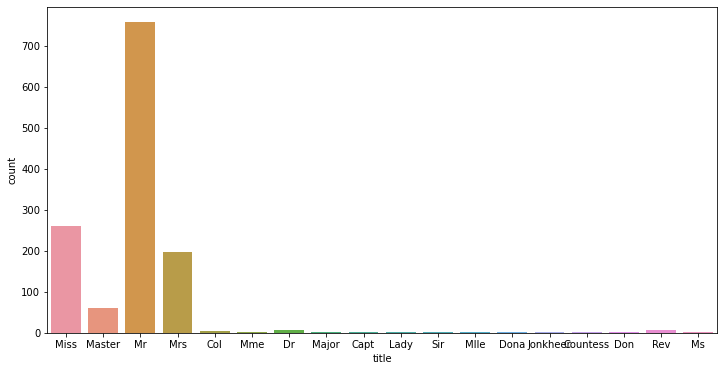

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["title"])
plt.show()

# **TITLE**

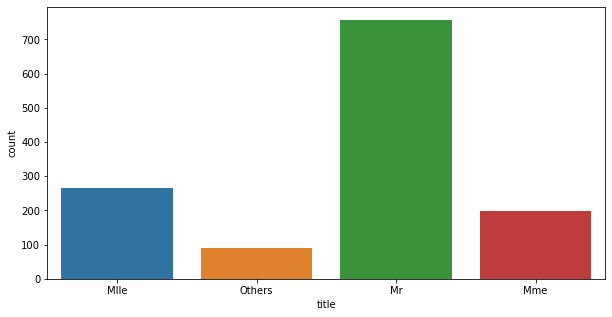

In [ ]:
# Réorganisation de la colonne title


df['title'] = df['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Master', 'Countess', 'Sir', 'Jonkheer', 'Capt', 'Don', 'Dona'], 'Others')
df['title'] = df['title'].replace('Ms', 'Mlle')
df['title'] = df['title'].replace('Mrs', 'Mme')
df['title'] = df['title'].replace('Lady', 'Mlle')
df['title'] = df['title'].replace('Miss', 'Mlle')

plt.figure(figsize=(10, 5))
sns.countplot(x=df["title"])
plt.show()

# **SEX**

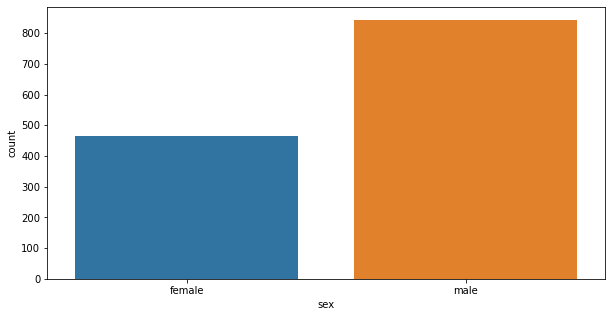

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["sex"])
plt.show()

# **EMBARKED**

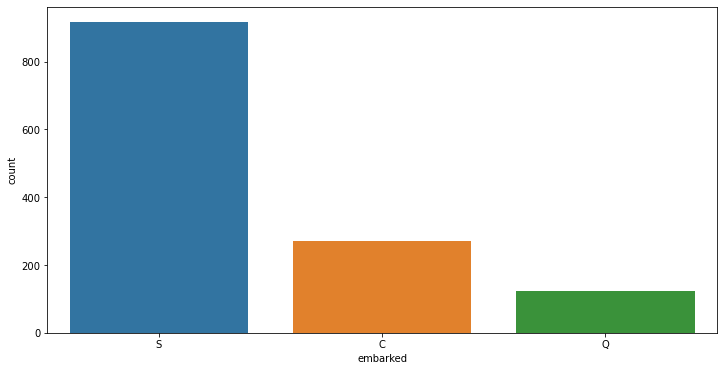

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["embarked"])
plt.show()

# **ALONE**

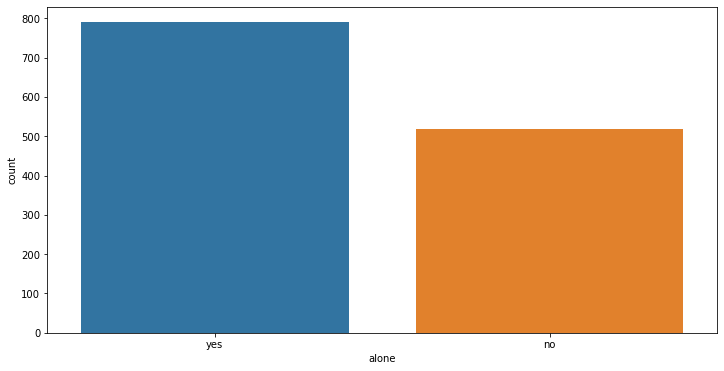

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["alone"])
plt.show()

# **FAMILY SIZE**

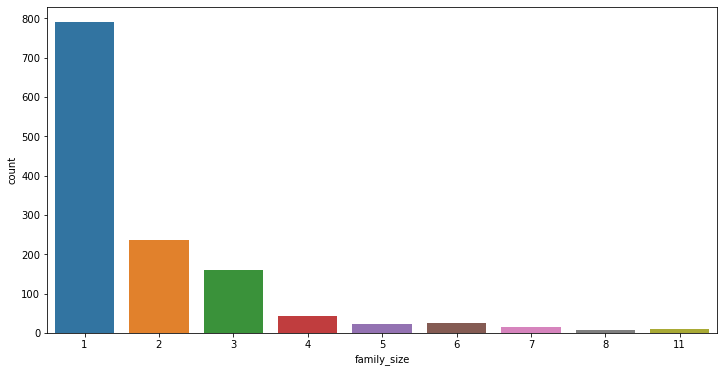

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["family_size"])
plt.show()

# **Gender**

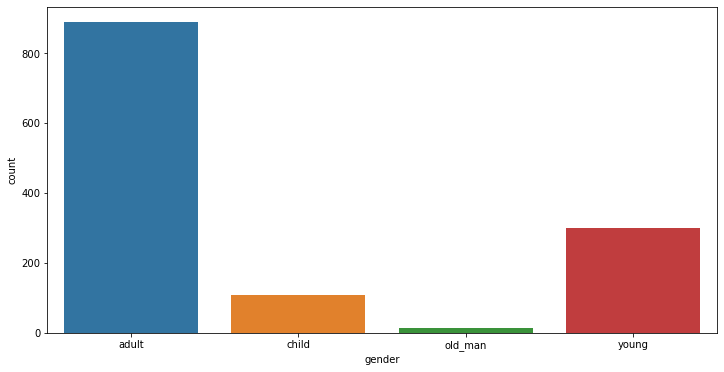

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["gender"])
plt.show()

# **Survived**

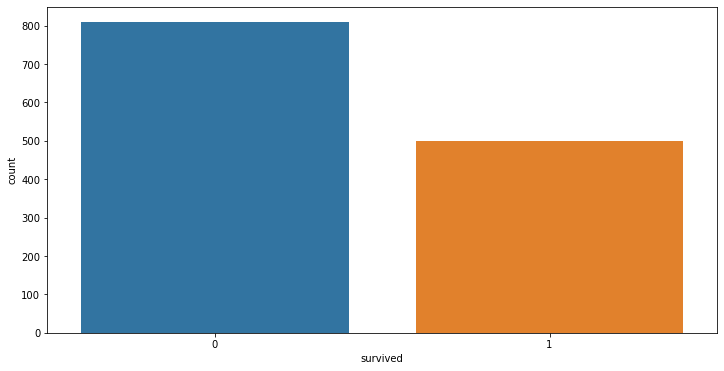

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["survived"])
plt.show()

# **Pclass**

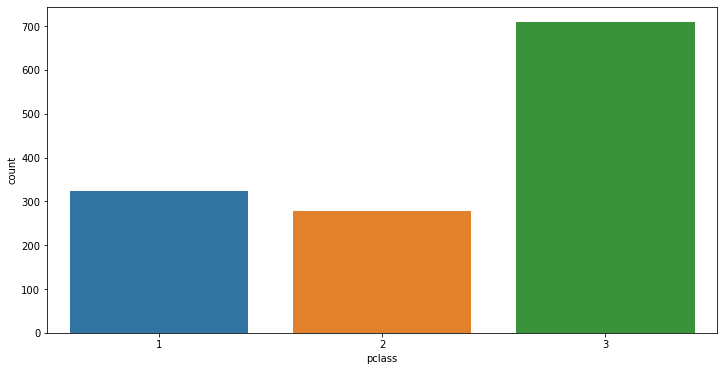

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["pclass"])
plt.show()

# **ANALYSE BIVARIÉE & MULTIVARIÉE**

### Survived vs Pclass

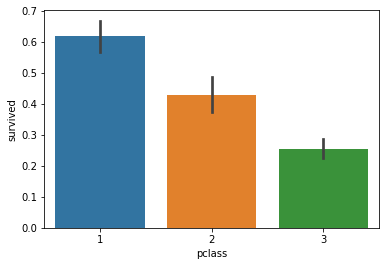

In [ ]:
plt.figure()
sns.barplot(data=df, x="pclass", y="survived")
plt.show()

### Survived vs Title

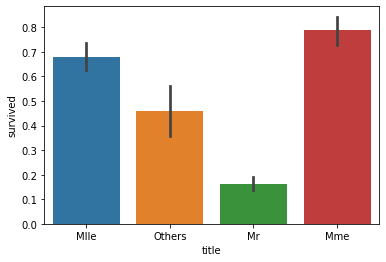

In [ ]:
plt.figure()
sns.barplot(data=df, x="title", y="survived")
plt.show()

### Survived vs Sex

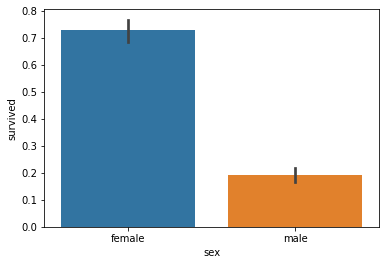

In [ ]:
plt.figure()
sns.barplot(data=df, x="sex", y="survived")
plt.show()

### Survived vs Embarked

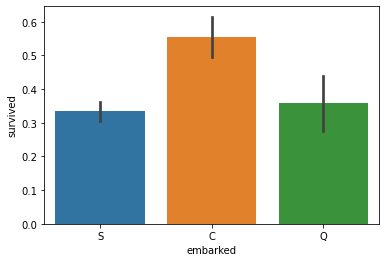

In [ ]:
plt.figure()
sns.barplot(data=df, x="embarked", y="survived")
plt.show()

### Age and Class

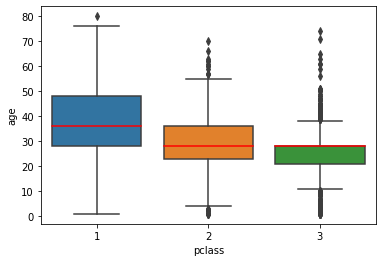

In [ ]:
plt.figure()
sns.boxplot(data=df, x="pclass", y="age", medianprops={'color':'red'})
plt.show()

### Survived and Age

In [ ]:
df['age'].notna().sum()

1309

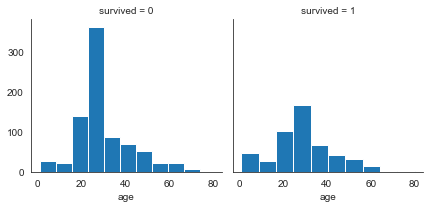

In [ ]:
sns.set_style("white")
grid = sns.FacetGrid(data = df[df['age'].notna()], col = 'survived')
grid.map(plt.hist, "age");
grid.add_legend()

### LOGISTIC REGRESSION

In [ ]:
df["sex"]=df["sex"].map({"female": 1, "male": 0})
df["embarked"]=df["embarked"].map({"Q" : 2, "C": 1, "S": 0})
df["title"]=df["title"].map({"Others" : 3, "Mme" : 2, "Mlle": 1, "Mr": 0})
df["gender"]=df["gender"].map({"old_man" : 3, "child" : 2, "young": 1, "adult": 0})
df["alone"]=df["alone"].map({"yes": 1, "no": 0})
df.head()

,pclass,survived,sex,age,embarked,title,alone,family_size,gender
0,1,1,1,29,0,1,1,1,0
1,1,1,0,1,0,3,0,4,2
2,1,0,1,2,0,1,0,4,2
3,1,0,0,30,0,0,0,4,0
4,1,0,1,25,0,2,0,4,0


In [ ]:
x = df[['pclass', 'sex', 'age', 'embarked', 'title', 'alone', 'family_size', 'gender']]
y = df['survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={}".format(logreg.score(x_test, y_test)))

Accuracy=0.8109756097560976


### CONFUSION MATRICE

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

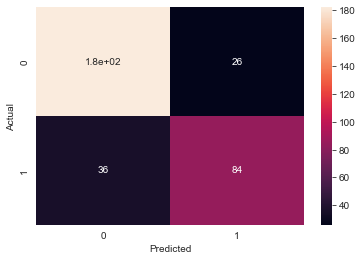

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### USING ROC/AUC

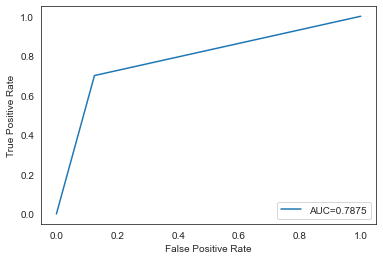

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### KNN

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.7748091603053435


In [ ]:
#choose the good value
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.77
Accuracy for k= 2 is: 0.77
Accuracy for k= 3 is: 0.77
Accuracy for k= 4 is: 0.79
Accuracy for k= 5 is: 0.78
Accuracy for k= 6 is: 0.79
Accuracy for k= 7 is: 0.8
Accuracy for k= 8 is: 0.8
Accuracy for k= 9 is: 0.78
Accuracy for k= 10 is: 0.77
Accuracy for k= 11 is: 0.79
Accuracy for k= 12 is: 0.77
Accuracy for k= 13 is: 0.78
Accuracy for k= 14 is: 0.79
Accuracy for k= 15 is: 0.79
Accuracy for k= 16 is: 0.78
Accuracy for k= 17 is: 0.78
Accuracy for k= 18 is: 0.77
Accuracy for k= 19 is: 0.76
Accuracy for k= 20 is: 0.76
Accuracy for k= 21 is: 0.78
Accuracy for k= 22 is: 0.77
Accuracy for k= 23 is: 0.78
Accuracy for k= 24 is: 0.79
Accuracy for k= 25 is: 0.79
Accuracy for k= 26 is: 0.78
Accuracy for k= 27 is: 0.76
Accuracy for k= 28 is: 0.79
Accuracy for k= 29 is: 0.78


### DECISION TREE AND RANDOM FOREST

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
x = df[['pclass', 'sex', 'age', 'embarked', 'title', 'alone', 'family_size', 'gender']]
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7862595419847328


[Text(0.5, 0.9166666666666666, 'X[1] <= 0.05\ngini = 0.47\nsamples = 1047\nvalue = [651, 396]'),
 Text(0.3076923076923077, 0.75, 'X[4] <= 2.062\ngini = 0.295\nsamples = 663\nvalue = [544, 119]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[0] <= 2.949\ngini = 0.254\nsamples = 596\nvalue = [507, 89]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.307\nsamples = 238\nvalue = [193, 45]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.216\nsamples = 358\nvalue = [314, 44]'),
 Text(0.46153846153846156, 0.5833333333333334, 'X[6] <= 3.646\ngini = 0.495\nsamples = 67\nvalue = [37, 30]'),
 Text(0.38461538461538464, 0.4166666666666667, 'X[5] <= 0.247\ngini = 0.487\nsamples = 43\nvalue = [18, 25]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.46153846153846156, 0.25, 'X[0] <= 1.789\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.38461538461538464, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text

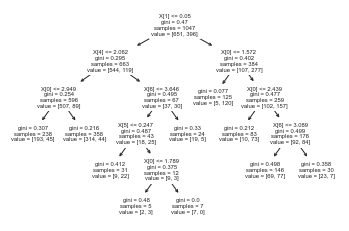

In [ ]:
tree.plot_tree(dtree)

In [ ]:
x = df[['pclass', 'sex', 'age', 'embarked', 'title', 'alone', 'family_size', 'gender']]
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 8, min_samples_leaf = 3, max_depth = 3)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7519083969465649


In [ ]:
from sklearn.ensemble import RandomForestClassifier
x = df[['pclass', 'sex', 'age', 'embarked', 'title', 'alone', 'family_size', 'gender']]
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7748091603053435


In [ ]:
from sklearn.ensemble import RandomForestClassifier
x = df[['pclass', 'sex', 'age', 'embarked', 'title', 'alone', 'family_size', 'gender']]
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=16)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7709923664122137
